actividad de laboratorio (procesando imagenes)

-carga una imagen en formato BGR utilizando cv2.imread.
-muestra la imagen en formato BGR usando Matplotlib, pero convierta a rgb para que se muestre correctamente.
-utiliza cv2.cvtColor para convertir la imagen de bgr a escala de grises.
-Guarda la imagen convertida en el ordenador.
-muestra la imagen convertida en escala de grises.
-para mostrar las imagenes crea una funcion.

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
from collections import Counter
from scipy import ndimage as ndi
from skimage import feature
import scipy.misc
import numpy as np
import statistics
import random
import scipy

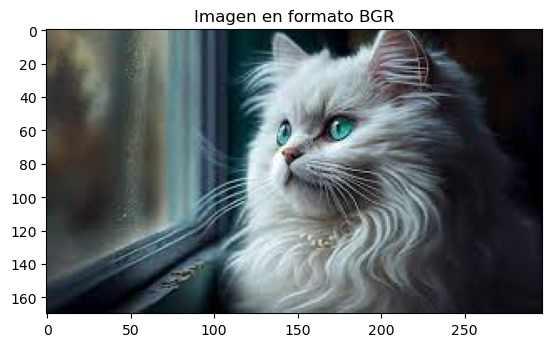

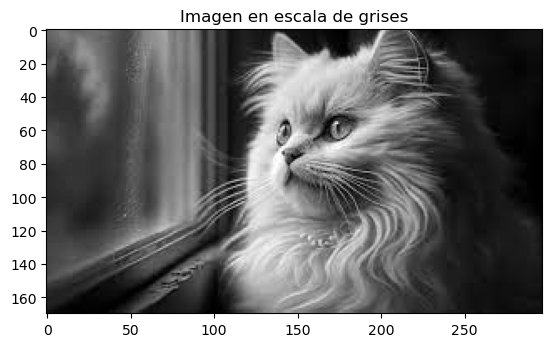

In [2]:
import cv2
import matplotlib.pyplot as plt

def mostraImagen(ruta_imagen):
    imagen_bgr = cv2.imread(ruta_imagen)
    plt.imshow(cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB))
    plt.title('Imagen en formato BGR')
    plt.show()
    imagen_gris = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('imagen_gris.png', imagen_gris)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title('Imagen en escala de grises')
    plt.show()

ruta_imagen = 'gatin.jfif'
mostraImagen(ruta_imagen)


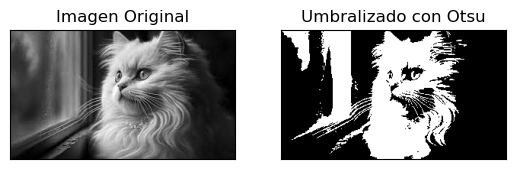

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('gatin.jfif', 0)
_, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(thresh, cmap='gray')
plt.title('Umbralizado con Otsu'), plt.xticks([]), plt.yticks([])

plt.show()


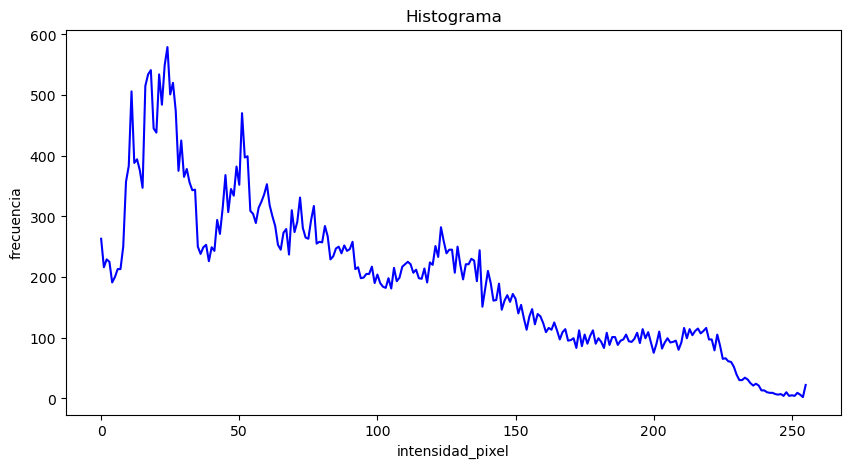

In [17]:
import cv2
import matplotlib.pyplot as plt

def histograma(img):
    histo=cv2.calcHist([img], [0],None,[256],[0,256])

    plt.figure(figsize=(10,5))
    plt.plot(histo,color="blue")
    plt.title('Histograma')
    plt.xlabel('intensidad_pixel')
    plt.ylabel('frecuencia')
    plt.show()
    
#img=cv2.imread('cat.jpg',0)
img=cv2.imread('gatin.jfif',0)

histograma(img)

clase 13_03_24  
Umbralización

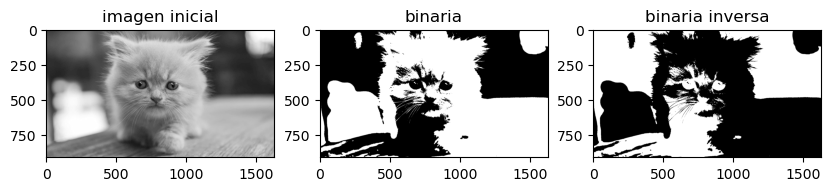

In [18]:
import cv2
import matplotlib.pyplot as plt 

img=cv2.imread('michi.jpg',0)
_, umbralbi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY )
# umbral inverso
_, umbral_inc_bi=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
#plotear tamaño de imagen
plt.figure(figsize=(10,5))
#plotear imagen
plt.subplot(1,3,1)
#color de imagen
plt.imshow(img,cmap='gray')
#titulo de imagen
plt.title('imagen inicial')

plt.subplot(1,3,2)
plt.imshow(umbralbi,cmap='gray')
plt.title('binaria')

plt.subplot(1,3,3)
plt.imshow(umbral_inc_bi,cmap='gray')
plt.title('binaria inversa')

plt.show()


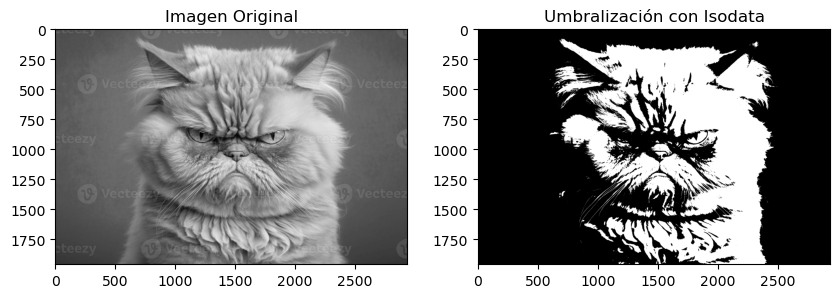

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Función que aplica la umbralización global con el algoritmo de Isodata
def isodata(image):
    # Umbral inicial decidimos del espectro de 0 a 255
    threshold = 128
    
    while True:
        # Se divide la imagen en dos grupos según el umbral
        
        groupo1 = image[image <= threshold] # grupo donde el umbral es menor o igual al determinado
        groupo2 = image[image > threshold] # grupo donde el umbral es mayor al determinado
        
        # Se calcula la media de cada grupo
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        
        # Nuevo umbral
        nuevo_umbral = (media1 + media2) / 2 # segun formula 
        
        # Si el nuevo umbral es igual al umbral anterior, se detiene el bucle
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        
        threshold = nuevo_umbral
    
    return threshold

# imagen en canal 0
imagen = cv2.imread('cat.jpg', 0)

# llamamos a funcion con imagen seleccionada 
umbral_isodata = isodata(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_isodata, 255, cv2.THRESH_BINARY) #OJO el "_" es una variable pero que ignoramos (almacena el valor del umbral) 

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Isodata')


plt.show()

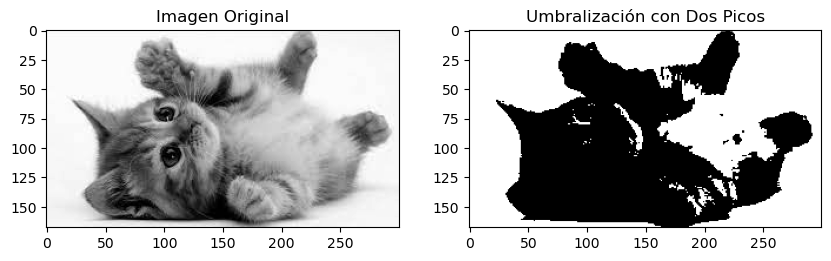

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para aplicar la umbralización global con el algoritmo de dos picos
def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

# Cargamos la imagen en escala de grises
imagen = cv2.imread('gatito.jpg', 0)

# Aplicamos la umbralización global con el algoritmo de dos picos
umbral_dos_picos = dos_picos(imagen)

# Umbralización de la imagen
_, imagen_umbralizada = cv2.threshold(imagen, umbral_dos_picos, 255, cv2.THRESH_BINARY)

# Mostramos la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')


plt.subplot(1, 2, 2)
plt.imshow(imagen_umbralizada, cmap='gray')
plt.title('Umbralización con Dos Picos')


plt.show()

clase 13_03_24

Umbrales adaptativas.

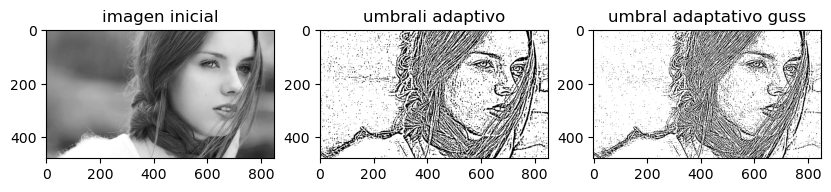

In [22]:
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('girl.jpg',0)

umb_adap=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
umb_adad_guss=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)


#plotear tamaño de imagen
plt.figure(figsize=(10,5))
#plotear imagen
plt.subplot(1,3,1)
#color de imagen
plt.imshow(img,cmap='gray')
#titulo de imagen
plt.title('imagen inicial')

plt.subplot(1,3,2)
plt.imshow(umb_adap,cmap='gray')
plt.title('umbrali adaptivo')

plt.subplot(1,3,3)
plt.imshow(umb_adad_guss,cmap='gray')
plt.title('umbral adaptativo guss')

plt.show()

import cv2
import matplotlib.pyplot as plt
img=cv2.imread('girl.jpg',0)
